In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

from sklearn.model_selection import train_test_split
from feature_engine.outliers import ArbitraryOutlierCapper
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [2]:
df = pd.read_csv('Real_Estate.csv')
df.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


In [3]:
df.shape

(414, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


In [5]:
df.describe()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,18.405072,1064.468233,4.265700,24.973605,121.520268,29.102149
std,11.757670,1196.749385,2.880498,0.024178,0.026989,15.750935
min,0.000000,23.382840,0.000000,24.932075,121.473888,0.000000
25%,9.900000,289.324800,2.000000,24.952422,121.496866,18.422493
50%,16.450000,506.114400,5.000000,24.974353,121.520912,30.394070
75%,30.375000,1454.279000,6.750000,24.994947,121.544676,40.615184
max,42.700000,6306.153000,10.000000,25.014578,121.565321,65.571716


In [6]:
df.isnull().sum()

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64

In [7]:
df['Transaction date'] = pd.to_datetime(df['Transaction date']).dt.normalize()

In [8]:
df.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06,8.5,967.4000,6,25.011037,121.479946,21.654710


In [9]:
df.columns

Index(['Transaction date', 'House age', 'Distance to the nearest MRT station',
       'Number of convenience stores', 'Latitude', 'Longitude',
       'House price of unit area'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Transaction date                     414 non-null    datetime64[ns]
 1   House age                            414 non-null    float64       
 2   Distance to the nearest MRT station  414 non-null    float64       
 3   Number of convenience stores         414 non-null    int64         
 4   Latitude                             414 non-null    float64       
 5   Longitude                            414 non-null    float64       
 6   House price of unit area             414 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 22.8 KB


In [13]:
df.corr()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
Transaction date,1.000000,-0.020055,-0.001457,-0.088136,-0.011618,0.091798,-0.017929
House age,-0.020055,1.000000,0.021596,0.021973,0.114345,0.036449,-0.012284
Distance to the nearest MRT station,-0.001457,0.021596,1.000000,0.069015,0.038954,0.064229,-0.636579
Number of convenience stores,-0.088136,0.021973,0.069015,1.000000,0.082725,0.013156,0.280763
Latitude,-0.011618,0.114345,0.038954,0.082725,1.000000,0.007754,0.081008
Longitude,0.091798,0.036449,0.064229,0.013156,0.007754,1.000000,-0.098626
House price of unit area,-0.017929,-0.012284,-0.636579,0.280763,0.081008,-0.098626,1.000000


<Axes: >

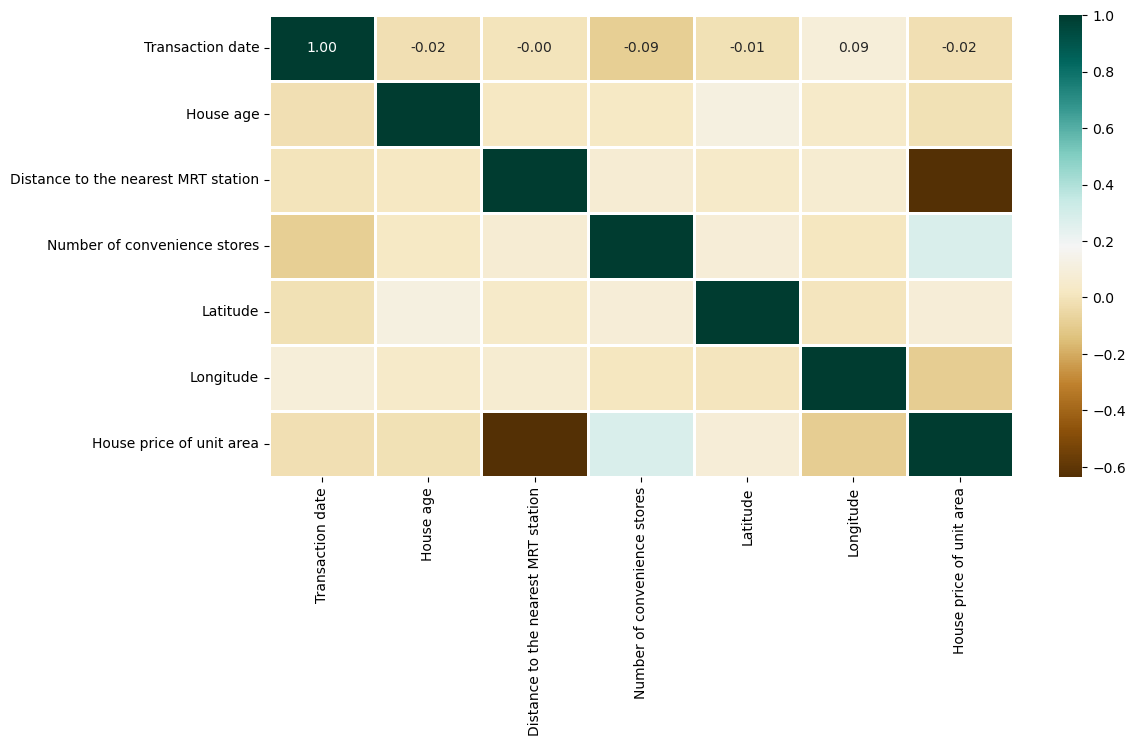

In [15]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), cmap = 'BrBG', fmt = '.2f', linewidths = 2, annot = True)

In [18]:
df.isnull().sum()

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64

In [19]:
df.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06,8.5,967.4000,6,25.011037,121.479946,21.654710


<Axes: >

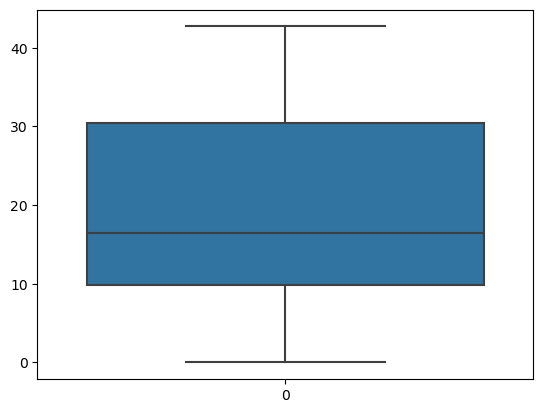

In [20]:
sns.boxplot(df['House age'])

In [23]:
df.columns

Index(['Transaction date', 'House age', 'Distance to the nearest MRT station',
       'Number of convenience stores', 'Latitude', 'Longitude',
       'House price of unit area'],
      dtype='object')

<Axes: >

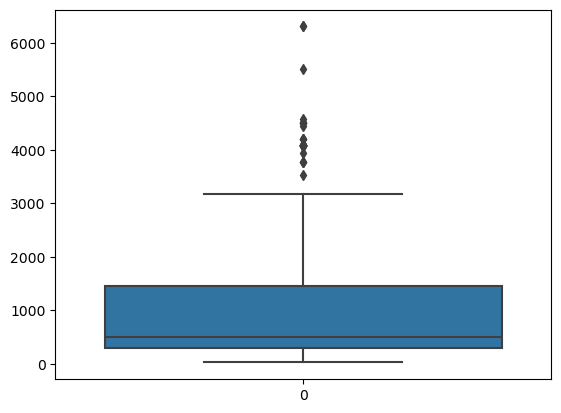

In [26]:
sns.boxplot(df['Distance to the nearest MRT station'])

In [27]:
Q1 = df['Distance to the nearest MRT station'].quantile(0.25)
Q2 = df['Distance to the nearest MRT station'].quantile(0.5)
Q3 = df['Distance to the nearest MRT station'].quantile(0.75)

iqr = Q3 - Q1

lowlim = Q1 - 1.5 * iqr
upplim = Q3 + 1.5 * iqr

print(lowlim)
print(upplim)

-1458.1065000000003
3201.7103


<Axes: >

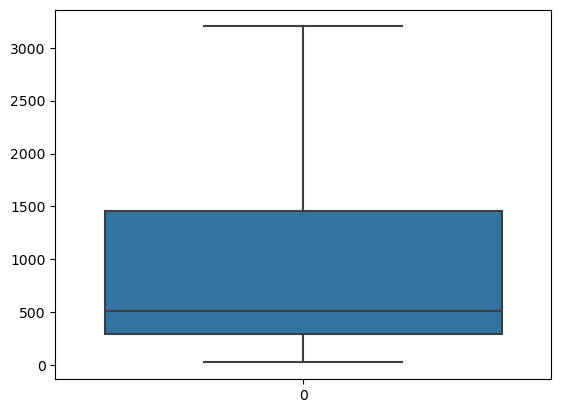

In [28]:
arb = ArbitraryOutlierCapper(min_capping_dict={'Distance to the nearest MRT station':-1458.1065},max_capping_dict={'Distance to the nearest MRT station':3201.7103})

df[['Distance to the nearest MRT station']] = arb.fit_transform(df[['Distance to the nearest MRT station']])

sns.boxplot(df['Distance to the nearest MRT station'])

<Axes: >

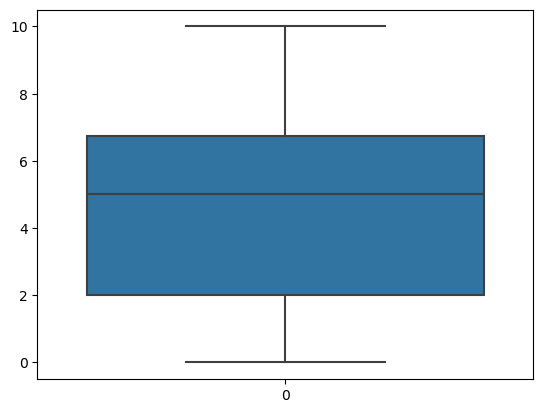

In [29]:
sns.boxplot(df['Number of convenience stores'])

<Axes: >

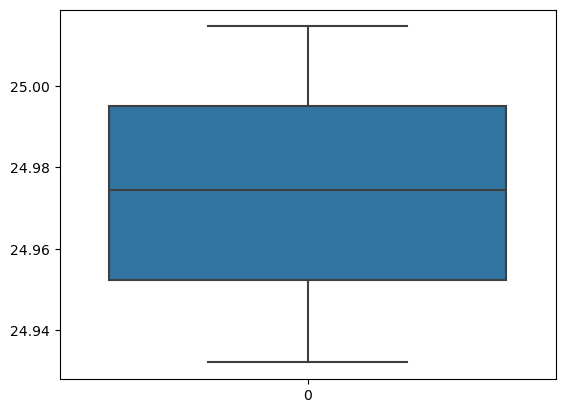

In [30]:
sns.boxplot(df['Latitude'])

<Axes: >

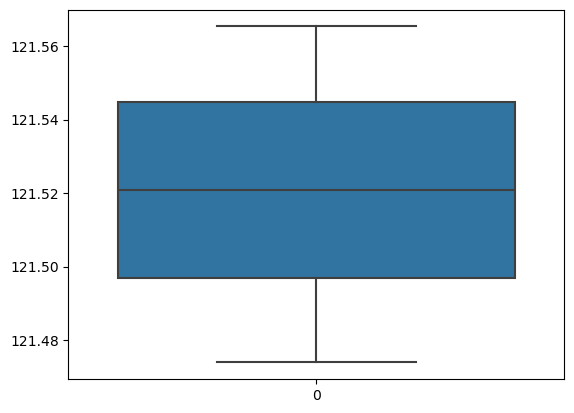

In [31]:
sns.boxplot(df['Longitude'])

In [32]:
df[df.duplicated]

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area


In [33]:
df['Transaction date day'] = df['Transaction date'].dt.day
df['Transaction date month'] = df['Transaction date'].dt.month
df['Transaction date year'] = df['Transaction date'].dt.year
df.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area,Transaction date day,Transaction date month,Transaction date year
0,2012-09-02,13.3,3201.7103,8,25.007059,121.561694,6.488673,2,9,2012
1,2012-09-04,35.5,274.0144,2,25.012148,121.546990,24.970725,4,9,2012
2,2012-09-05,1.1,1978.6710,10,25.003850,121.528336,26.694267,5,9,2012
3,2012-09-05,22.2,1055.0670,5,24.962887,121.482178,38.091638,5,9,2012
4,2012-09-06,8.5,967.4000,6,25.011037,121.479946,21.654710,6,9,2012


In [34]:
df.columns

Index(['Transaction date', 'House age', 'Distance to the nearest MRT station',
       'Number of convenience stores', 'Latitude', 'Longitude',
       'House price of unit area', 'Transaction date day',
       'Transaction date month', 'Transaction date year'],
      dtype='object')

In [35]:
X_col = df[['House age', 'Distance to the nearest MRT station',
       'Number of convenience stores', 'Latitude', 'Longitude',
       'House price of unit area', 'Transaction date day',
       'Transaction date month', 'Transaction date year']]
X_col.head()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area,Transaction date day,Transaction date month,Transaction date year
0,13.3,3201.7103,8,25.007059,121.561694,6.488673,2,9,2012
1,35.5,274.0144,2,25.012148,121.546990,24.970725,4,9,2012
2,1.1,1978.6710,10,25.003850,121.528336,26.694267,5,9,2012
3,22.2,1055.0670,5,24.962887,121.482178,38.091638,5,9,2012
4,8.5,967.4000,6,25.011037,121.479946,21.654710,6,9,2012


In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
# define min max scaler
scaler = MinMaxScaler()
# transform data
X = scaler.fit_transform(X_col)

In [39]:
X

array([[0.31147541, 1.        , 0.8       , ..., 0.03333333, 0.72727273,
        0.        ],
       [0.83138173, 0.07885643, 0.2       , ..., 0.1       , 0.72727273,
        0.        ],
       [0.02576112, 0.61519406, 1.        , ..., 0.13333333, 0.72727273,
        0.        ],
       ...,
       [0.        , 0.13474353, 0.8       , ..., 0.9       , 0.54545455,
        1.        ],
       [0.84074941, 0.0848292 , 0.5       , ..., 0.93333333, 0.54545455,
        1.        ],
       [0.28103044, 0.02110331, 0.6       , ..., 0.        , 0.63636364,
        1.        ]])

In [40]:
X = pd.DataFrame(X, columns=['House age', 'Distance to the nearest MRT station',
       'Number of convenience stores', 'Latitude', 'Longitude',
       'House price of unit area', 'Transaction date day',
       'Transaction date month', 'Transaction date year'])

X

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area,Transaction date day,Transaction date month,Transaction date year
0,0.311475,1.000000,0.8,0.908861,0.960336,0.098955,0.033333,0.727273,0.0
1,0.831382,0.078856,0.2,0.970550,0.799515,0.380815,0.100000,0.727273,0.0
2,0.025761,0.615194,1.0,0.869967,0.595503,0.407100,0.133333,0.727273,0.0
3,0.519906,0.324600,0.5,0.373466,0.090672,0.580916,0.133333,0.727273,0.0
4,0.199063,0.297017,0.6,0.957079,0.066259,0.330245,0.166667,0.727273,0.0
...,...,...,...,...,...,...,...,...,...
409,0.428571,0.046171,0.6,0.595260,0.141192,0.443733,0.800000,0.545455,1.0
410,0.278689,0.094486,0.2,0.218113,0.109701,0.516554,0.833333,0.545455,1.0
411,0.000000,0.134744,0.8,0.385758,0.760115,0.385152,0.900000,0.545455,1.0
412,0.840749,0.084829,0.5,0.797397,0.923060,0.385618,0.933333,0.545455,1.0


In [42]:
y = df['House price of unit area']
y.head()

0     6.488673
1    24.970725
2    26.694267
3    38.091638
4    21.654710
Name: House price of unit area, dtype: float64

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Linear regression

In [44]:
mymodel = LinearRegression()

In [45]:
mymodel.fit(X_train,y_train)

LinearRegression()

In [46]:
y_train_predicted = mymodel.predict(X_train)

In [47]:
MSE_Train = mean_squared_error(y_train, y_train_predicted).round()
MSE_Train

0.0

## RMSE

In [48]:
(MSE_Train**0.5).round()

0.0

## R-Squared

In [49]:
r2_score(y_train,y_train_predicted).round(3)

1.0

## Observing Model Performance on the Test Dataset

In [50]:
y_test_predicted = mymodel.predict(X_test)

In [51]:
MSE_Test = mean_squared_error(y_test, y_test_predicted).round()
MSE_Test

0.0

## RMSE on test

In [52]:
(MSE_Test**0.5).round()

0.0

## R-Squared on test

In [53]:
r2_score(y_test,y_test_predicted).round(3)

1.0

## SVR Model

In [54]:
svrmodel = SVR()
svrmodel.fit(X_train, y_train)

ypredtrain1 = svrmodel.predict(X_train)
ypredtest1 = svrmodel.predict(X_test)

print(r2_score(y_train, ypredtrain1))
print(r2_score(y_test, ypredtest1))
print(cross_val_score(svrmodel, X, y, cv=5,).mean())

0.6947287377234763
0.6789212350925395
0.6172871467223359


## Random Forest Regression

In [55]:
rfmodel = RandomForestRegressor(random_state=40)
rfmodel.fit(X_train,y_train)

ypredtrain2 = rfmodel.predict(X_train)
ypredtest2 = rfmodel.predict(X_test)

print(r2_score(y_train,ypredtrain2))
print(r2_score(y_test,ypredtest2))
print(cross_val_score(rfmodel, X, y, cv=5,).mean())

0.9999253567140302
0.9995191260542373
0.9996148835487515


## Gradient Boost Regression

In [56]:
gbmodel = GradientBoostingRegressor()
gbmodel.fit(X_train,y_train)

ypredtrain3 = gbmodel.predict(X_train)
ypredtest3 = gbmodel.predict(X_test)

print(r2_score(y_train,ypredtrain3))
print(r2_score(y_test,ypredtest3))
print(cross_val_score(gbmodel, X, y, cv=5,).mean())

0.9999784131770746
0.9997298831286564
0.999827253046042


## XGB Regression

In [57]:
xgmodel=XGBRegressor()

xgmodel.fit(X_train,y_train)

ypredtrain4 = xgmodel.predict(X_train)
ypredtest4 = xgmodel.predict(X_test)

print(r2_score(y_train, ypredtrain4))
print(r2_score(y_test, ypredtest4))
print(cross_val_score(xgmodel, X, y, cv=5,).mean())

0.9999999890442371
0.9993070935333321
0.9991284834888374
